# SER-347 - Introdução à Programação para Sensoriamento Remoto

# Sazonalidade de Cheias - Seasonality Index

-  Ana Carolina Calderaro
-  Andréa Lima
-  Felício Cassalho

# 1. Introdução

<div style="text-align: justify"> Índices de sazonalidade de cheias têm sido utilizados para delinear regiões hidrologicamente homogêneas, sendo aplicados para fins de regionalização (Sarhadi and Modarres, 2011). Uma das principais razões para o uso desses índices tem sido atribuída ao fato de serem dados observados e quase livre de erros (Ouarda et al.2006). Além disso, eles são utilizados para desenvolver previsões de cheias, políticas de preservação e operações em reservatórios (Chen et al. 2013).</div>

<div style="text-align: justify"> Chen et al. (2013) os dividiu em duas categorias, baseadas em: i) mecanismo gerador; e ii) análises estatísticas de cheias, como estatística direcional e frequência relativa.  Entre essas abordagens, estatísticas direcionais destacam-se pela sua eficácia em estabelecer medidas de similaridade a partir da ocorrência de eventos hidrológicos extremos.</div>

<div style="text-align: justify"> Segundo Villarini (2016), as estatísticas direcionais são melhor analisadas quando representadas por uma circunferência. Em hidrologia, isso geralmente ocorre se os dados apresentam periodicidade,  i. e. ocorrência de cheias (Pewsey et al., 2013). Entre as estatísticas direcionais existentes o índice de sazonalidade é fortemente recomendado (Cunderlik et al. 2004).</div>


<div style="text-align: justify"> Ao aplicar o índice de sazonalidade à análise de cheias, é necessária a identificação da data juliana de cada ocorrência registrada na série $MAS$. Cada data de ocorrência é então convertida em uma valor angular e depois, com base em todas as datas, sua média e variância são calculadas (Chen et al. 2013).</div>

![Alt text](https://github.com/Andrealioli/projetoser347/blob/master/imagem.png?raw=true "Fluxograma")

# 2. Programa para Calcular o Índice de Sazonalidade

A função **sazonalidade** recebe a localização de um arquivo _excel_, com uma coluna com datas da máxima cheia da série temporal de uma estação e calcula os valores de $\bar{x}$,  $\bar{y}$,  $\bar{\theta}$   e  $MDF$ (_Mean Day of Flood_). 


Exemplo da coluna no excel usada na função **sazonalidade**. As datas que aparecem na tabela são as datas do $MAS$ (_Maximum Annual Streamflow_).
![Alt text](https://github.com/Andrealioli/projetoser347/blob/master/imagem3.jpg?raw=true "Excel")

In [1]:
#A função sazonalidade recebe a localização de um arquivo (xlsx) e calcula o índice de sazonalidade de cheias
def sazonalidade(file_location):
    
    #Função que calcula o valor do ângulo theta de cada ano de uma estação
    def theta(file_location):
        import pandas as pd
        import numpy as np
        
        #Carregando a planilha excel
        xl = pd.ExcelFile(file_location)
        
        #Transformando a planilha em um dataframe
        df1 = xl.parse('Plan1')


        #Transformando uma data em dia Juliano
        import datetime as dt
        data_flood = [df1.loc[:]['DATE_ACCESS']]
        jd = [ts.dt.dayofyear for ts in data_flood]
        anos_bis = [ts.dt.is_leap_year for ts in data_flood]
        
        #Calculando o ângulo theta i
        angulo_theta = np.empty(shape=np.shape(jd))
        for j in range(0,len(angulo_theta[0][:]-1)):
            if anos_bis[0][j]==True:
                angulo_theta[0][j] = jd[0][j]*2*np.pi/366
            elif anos_bis[0][j] == False:
                angulo_theta[0][j] = jd[0][j] * 2 * np.pi / 365
        angulo_theta = angulo_theta[0][:]
        #retorna uma lista com os valores de theta i
        return(angulo_theta)

    # Função que calcula o valor de x médio
    def x (angulo_theta):
        import numpy as np
        import math
        costheta = [math.cos(i) for i in angulo_theta]
        xvalue= sum(costheta)/len(costheta)
        return(xvalue)

    # Função que calcula o valor de y médio
    def y (angulo_theta):
        import numpy as np
        import math
        sintheta = [math.sin(i) for i in angulo_theta]
        yvalue = sum(sintheta) / len(sintheta)
        return (yvalue)

    #Função que calcula o valor de r com base nos valores de x e y
    def r (x, y):
        import numpy as np
        import math
        rvalue = math.sqrt(x**2+y**2)
        return(rvalue)
    #Função que calcula o valor de theta médio
    def angtheta(x, y):
        import math
        import numpy as np
        if x > 0 and y > 0:
            t = math.atan(y/x)
        elif x < 0:
            t = math.atan(y/x)+ math.pi
        elif x > 0 and y < 0:
            t = math.atan(y/x) + 2*math.pi
        elif x == 0 and y > 0:
            t = math.pi/2
        elif x == 0 and y < 0:
            t = (3*math.pi)/2
        elif x==0 and y==0:
            t = None
        return(t)
    #Função que calcula o valor do MDF com base no angulo theta médio
    def mdf(t):
        import math
        import numpy as np
        m = (t*365)/(2*math.pi)
        return(m)
    
    import numpy as np
    index = np.empty(5)
    index[0] = x(theta(file_location))
    index[1] = y(theta(file_location))
    index[2] = r(index[0], index[1])
    index[3] = angtheta(index[0], index[1])
    index[4] = mdf(index[3])

    #print("Valores [x, y, r, theta, mdf] ", index )
    return([index[0],index[1],index[2],index[3],index[4]])

Exemplo de saída da função

In [2]:
a = sazonalidade(r"C:\Ser347\DADOS\72430000_julian.xlsx")
print("x = ", a[0])
print("y = ", a[1])
print("theta = ", a[2])
print("MDF  = ", a[3])


x =  -0.3685282310639447
y =  -0.3825037871246037
theta =  0.5311517713947534
MDF  =  3.9455971385929627


A função **todosdados** recebe um diretório e aplica a função **sazonalidade** para todos os arquivos correspondentes às estações e salva em uma lista. 

In [5]:
#A função 'todosdados' aplica a função 'sazonalidade' a todos os arquivos correspondentes às séries históricas
def todosdados(diretorio):
    import os
    import numpy as np

    arqs = os.listdir(diretorio)
    matriz = [] 
    
    for i in arqs:
        file_location = diretorio + i
        resultados = sazonalidade(file_location)
        matriz.append(resultados)
    return(matriz)

Verificando número de arquivos no diretório **DADOS** que será colocado na função **todosdados**.

In [13]:
#número de estações na pasta
import os
arqs = os.listdir("C:/Ser347/DADOS/")
print("Número de arquivos:", len(arqs))

Número de arquivos: 69


In [14]:
#Exemplo de aplicação da função 
b = todosdados("C:/Ser347/DADOS/")
print(b[0])

[-0.3685282310639447, -0.3825037871246037, 0.5311517713947534, 3.9455971385929627, 229.20587014055243]


A função **plot** pega os dados do $r$ e do $\bar{\theta}$ de cada estação na matriz criada acima e plota no gráfico polar. Sendo que cada ponto no gráfico representa uma estação. 

In [7]:
#A função 'plot' plota os dados no gráfico polar
def plot(matriz):
        import numpy as np
        import matplotlib.pyplot as plt
        m = np.array(matriz)
        
        #dados de entrada para a plotagem, o r e t foram extraídos da matriz gerada pela função todosdados(diretorio)
        r = m[:, 2]
        t = m[:, 3]
        area = 10
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='polar')
        ax.set_xlim((0, 2 * np.pi))
        
        #plotando o gráfico de mês em mês:
        ax.set_xticks(
            [0, ((np.pi) * (1 / 6)), (np.pi * (2 / 6)), (np.pi * (1 / 2)), (np.pi * (2 / 3)), (np.pi * (5 / 6)), np.pi,
             (2 * np.pi * (7 / 12)), \
             (2 * np.pi * (2 / 3)), (2 * np.pi * (3 / 4)), (2 * np.pi * (5 / 6)), (2 * np.pi * (11 / 12)), 2 * np.pi])
        ax.scatter(t, r, c='k', s=area, alpha=1)
        ax.set_title("Índice de Sazonalidade das Cheias no RS \n", fontsize=15)
        ax.set_xticklabels(
            ['1 Jan', '1 Fev', '1 Mar', '1 Abr', '1 Mai', '1 Jun', '1 Jul', '1 Ago', '1 Set', '1 Out', '1 Nov',
             '1 Dez'])
        ax.set_rmax(1)

        plt.show()

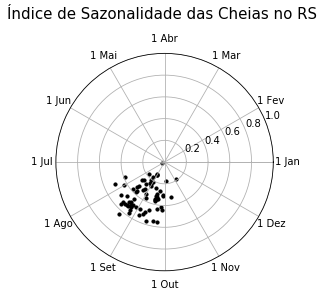

In [8]:
#Localização do diretório onde se encontram todas as séries históricas (arquivos xlsx)
diretorio = "C:/Ser347/DADOS/"

#Chamada da função que analisa todos os arquivos, essa função, por sua vez chama a função sazonalidade
matriz = todosdados(diretorio) 

#Aplicando a função de plotagem
plot(matriz)

Exemplo de aplicação

![Alt text](https://github.com/Andrealioli/projetoser347/blob/master/imagem2.png?raw=true "Mapas Estacoes")

<div style="text-align: justify"> Figura 1: Dia médio de cheias da sérir MAS: (a) valor do vetor 𝑟̅ ; (b) representação combinada  da sazonalidade de cheias de acordo com o índice de sazonalidade; (c) como proposto por Black e Werritty (1997). </div>